<a href="https://colab.research.google.com/github/Avishek-058/CSE_THESIS-CUET/blob/main/GLOVE_thesis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ***text cleaning***

In [1]:
!pip install contractions


In [2]:
import pandas as pd
#library that contains punctuation
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [3]:
df = pd.read_csv('/content/sample_data/final_dataset.csv')

In [4]:
import re
import string
import contractions  # Install it using: pip install contractions

def clean_text(text):
    if not isinstance(text, str):
        return text  # Return as-is if it's not a string (e.g., NaN)

    # Expand contractions (e.g., "aren't" → "are not", "they're" → "they are")
    text = contractions.fix(text)

    # Fix abbreviations: Converts "U.S.A." → "USA", "I.B.M." → "IBM", etc.
    text = re.sub(r'\b([A-Za-z])(?:\.[A-Za-z])+\.?\b', lambda x: x.group().replace('.', ''), text)

    # Preserve hyphenated words (e.g., "state-of-the-art")
    text = re.sub(r'(\b\w+)-(\w+\b)', r'\1-\2', text)

    # Preserve decimal numbers (e.g., 3.14 should stay as 3.14)
    text = re.sub(r'(\d+)\.(\d+)', r'\1DOTPLACEHOLDER\2', text)

    # Remove apostrophes only if they don't indicate contractions (keeps possessives intact)
    text = re.sub(r"(?<!\w)'|'(?!\w)", "", text)

    # Replace all punctuation (except hyphens) with spaces
    text = re.sub(r'[{}]'.format(re.escape(string.punctuation.replace("-", ""))), ' ', text)

    # Restore decimal points
    text = text.replace('DOTPLACEHOLDER', '.')

    # Normalize multiple spaces to a single space
    text = re.sub(r'\s+', ' ', text).strip()

    return text

# Example usage:
sample_text = "M.B.A US. should be USA. You SA should not change. They're going to the .U.K. It's IBM, not I.B.M. 3.14 should stay. Dr. John holds a Ph.D. in AI. State-of-the-art is useful."
cleaned_text = clean_text(sample_text)
print(cleaned_text)


MBA US should be USA You SA should not change They are going to the YOU K It is IBM not IBM 3.14 should stay Dr John holds a Ph D in AI State-of-the-art is useful


In [5]:
test_strings = [
    "Hello, World!",  # Basic punctuation
    "It's a great day.",  # Apostrophe handling
    "Python@3.9 is awesome!",  # Special characters
    "Hello... Are you there??",  # Multiple punctuation marks
    "Wow!!! This is amazing!!!",  # Consecutive exclamation marks
    "E-mail: test@example.com",  # Email-like text
    "$100 is a lot!",  # Currency symbol
    "i'm doing Don't state-of-the-art U.S.A. 3.14"
    " ",  # Empty space
    "",  # Empty string
    None  # NoneType
]

# Applying function to test cases
for text in test_strings:
    print(f"Original: {text}")
    print(f"Cleaned: {clean_text(text)}\n")


Original: Hello, World!
Cleaned: Hello World

Original: It's a great day.
Cleaned: It is a great day

Original: Python@3.9 is awesome!
Cleaned: Python 3.9 is awesome

Original: Hello... Are you there??
Cleaned: Hello Are you there

Original: Wow!!! This is amazing!!!
Cleaned: Wow This is amazing

Original: E-mail: test@example.com
Cleaned: E-mail test example com

Original: $100 is a lot!
Cleaned: 100 is a lot

Original: i'm doing Don't state-of-the-art U.S.A. 3.14 
Cleaned: i am doing Do not state-of-the-art YOU SA 3.14

Original: 
Cleaned: 

Original: None
Cleaned: None



In [6]:
# Apply function to DataFrame column
df['Review_Content_clean'] = df['Review_Content'].fillna('').apply(clean_text)

df.head()


,Category,Rating,Label,Review_Content,Review_Content_clean
0,Tools_and_Home_Improvement_5,3.0,0,"Good idea,but gave 3 stars because it didn't w...",Good idea but gave 3 stars because it did not ...
1,Pet_Supplies_5,5.0,1,Every batch has been great. It even smells aw...,Every batch has been great It even smells awesome
2,Clothing_Shoes_and_Jewelry_5,5.0,1,"This scarf was so cute in person, so happy I b...",This scarf was so cute in person so happy I bo...
3,Kindle_Store_5,4.0,1,I received this ARC from the publisher via net...,I received this ARC from the publisher via net...
4,Toys_and_Games_5,5.0,1,"Awesome kit, simple yet fun at the same time. ...",Awesome kit simple yet fun at the same time Ab...


In [7]:
df.to_csv('/content/clean_reviews.csv', index=False)

# ***UrL and Emails removing***

In [8]:
df['Review_Content_clean'] = df['Review_Content_clean'].apply(lambda x: re.sub(r'http\S+|www\S+', '<URL>', x))
df['Review_Content_clean'] = df['Review_Content_clean'].apply(lambda x: re.sub(r'\S+@\S+', '<EMAIL>', x))
df['Review_Content_clean'] = df['Review_Content_clean'].apply(lambda x: re.sub(r'@\w+', '<USER>', x))


In [9]:
df

,Category,Rating,Label,Review_Content,Review_Content_clean
0,Tools_and_Home_Improvement_5,3.0,0,"Good idea,but gave 3 stars because it didn't w...",Good idea but gave 3 stars because it did not ...
1,Pet_Supplies_5,5.0,1,Every batch has been great. It even smells aw...,Every batch has been great It even smells awesome
2,Clothing_Shoes_and_Jewelry_5,5.0,1,"This scarf was so cute in person, so happy I b...",This scarf was so cute in person so happy I bo...
3,Kindle_Store_5,4.0,1,I received this ARC from the publisher via net...,I received this ARC from the publisher via net...
4,Toys_and_Games_5,5.0,1,"Awesome kit, simple yet fun at the same time. ...",Awesome kit simple yet fun at the same time Ab...
...,...,...,...,...,...
9995,Kindle_Store_5,5.0,0,I totally loved this book. I couldn't put it d...,I totally loved this book I could not put it d...
9996,Tools_and_Home_Improvement_5,5.0,0,I ordered a couple of these to replace the old...,I ordered a couple of these to replace the old...
9997,Books_5,5.0,0,Wow! I absolutely loved this book. The charact...,Wow I absolutely loved this book The character...
9998,Electronics_5,4.0,1,Good product. Setup was a little difficult. So...,Good product Setup was a little difficult Soun...


# ***lowering text***

In [10]:
df['Review_Content_lower']= df['Review_Content_clean'].apply(lambda x: x.lower())

In [11]:
df

,Category,Rating,Label,Review_Content,Review_Content_clean,Review_Content_lower
0,Tools_and_Home_Improvement_5,3.0,0,"Good idea,but gave 3 stars because it didn't w...",Good idea but gave 3 stars because it did not ...,good idea but gave 3 stars because it did not ...
1,Pet_Supplies_5,5.0,1,Every batch has been great. It even smells aw...,Every batch has been great It even smells awesome,every batch has been great it even smells awesome
2,Clothing_Shoes_and_Jewelry_5,5.0,1,"This scarf was so cute in person, so happy I b...",This scarf was so cute in person so happy I bo...,this scarf was so cute in person so happy i bo...
3,Kindle_Store_5,4.0,1,I received this ARC from the publisher via net...,I received this ARC from the publisher via net...,i received this arc from the publisher via net...
4,Toys_and_Games_5,5.0,1,"Awesome kit, simple yet fun at the same time. ...",Awesome kit simple yet fun at the same time Ab...,awesome kit simple yet fun at the same time ab...
...,...,...,...,...,...,...
9995,Kindle_Store_5,5.0,0,I totally loved this book. I couldn't put it d...,I totally loved this book I could not put it d...,i totally loved this book i could not put it d...
9996,Tools_and_Home_Improvement_5,5.0,0,I ordered a couple of these to replace the old...,I ordered a couple of these to replace the old...,i ordered a couple of these to replace the old...
9997,Books_5,5.0,0,Wow! I absolutely loved this book. The charact...,Wow I absolutely loved this book The character...,wow i absolutely loved this book the character...
9998,Electronics_5,4.0,1,Good product. Setup was a little difficult. So...,Good product Setup was a little difficult Soun...,good product setup was a little difficult soun...


In [12]:
df.to_csv('/content/lower_reviews.csv', index=False)

# ***Lemmatizing***

In [13]:
!rm -rf /root/nltk_data
!mkdir -p /root/nltk_data
!python -m nltk.downloader -d /root/nltk_data all


<frozen runpy>:128: RuntimeWarning: 'nltk.downloader' found in sys.modules after import of package 'nltk', but prior to execution of 'nltk.downloader'; this may result in unpredictable behaviour
[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/abc.zip.
[nltk_data]    | Downloading package alpino to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/alpino.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger_eng to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping
[nltk_data]    |       taggers/averaged_perceptron_tagger_eng.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping


In [14]:
import nltk
nltk.data.path.append("/root/nltk_data")

# ✅ Download necessary NLTK resources
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger')

print("NLTK setup complete!")


NLTK setup complete!


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


In [15]:
import pandas as pd
import nltk
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet
from nltk import pos_tag
from gensim.utils import tokenize

# ✅ Download required resources
import nltk

# ✅ Download the correct resources
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger')  # ✅ Corrected this!


# ✅ Initialize WordNet Lemmatizer
lemmatizer = WordNetLemmatizer()

# ✅ Function to get correct POS tags for lemmatization
def get_wordnet_pos(word):
    tag = pos_tag([word])[0][1][0].upper()  # Get first letter of POS tag
    tag_dict = {"J": wordnet.ADJ, "V": wordnet.VERB, "N": wordnet.NOUN, "R": wordnet.ADV}
    return tag_dict.get(tag, wordnet.NOUN)  # Default to NOUN

# ✅ Function to apply tokenization + lemmatization
def lemmatize_text(text):
    tokens = list(tokenize(str(text)))  # Tokenize text
    return ' '.join([lemmatizer.lemmatize(word, get_wordnet_pos(word)) for word in tokens])

# ✅ Read dataset
df = pd.read_csv("/content/lower_reviews.csv")  # Change to your actual file

# ✅ Apply lemmatization
df['Lemmatized_Review'] = df['Review_Content_lower'].apply(lemmatize_text)

# ✅ Save to new CSV file
df.to_csv("lemmatized_dataset.csv", index=False)

print("✅ Lemmatization completed and saved successfully as 'lemmatized_dataset.csv'!")


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


✅ Lemmatization completed and saved successfully as 'lemmatized_dataset.csv'!


In [16]:
df

,Category,Rating,Label,Review_Content,Review_Content_clean,Review_Content_lower,Lemmatized_Review
0,Tools_and_Home_Improvement_5,3.0,0,"Good idea,but gave 3 stars because it didn't w...",Good idea but gave 3 stars because it did not ...,good idea but gave 3 stars because it did not ...,good idea but give star because it do not work...
1,Pet_Supplies_5,5.0,1,Every batch has been great. It even smells aw...,Every batch has been great It even smells awesome,every batch has been great it even smells awesome,every batch have be great it even smell awesome
2,Clothing_Shoes_and_Jewelry_5,5.0,1,"This scarf was so cute in person, so happy I b...",This scarf was so cute in person so happy I bo...,this scarf was so cute in person so happy i bo...,this scarf be so cute in person so happy i bou...
3,Kindle_Store_5,4.0,1,I received this ARC from the publisher via net...,I received this ARC from the publisher via net...,i received this arc from the publisher via net...,i receive this arc from the publisher via netg...
4,Toys_and_Games_5,5.0,1,"Awesome kit, simple yet fun at the same time. ...",Awesome kit simple yet fun at the same time Ab...,awesome kit simple yet fun at the same time ab...,awesome kit simple yet fun at the same time ab...
...,...,...,...,...,...,...,...
9995,Kindle_Store_5,5.0,0,I totally loved this book. I couldn't put it d...,I totally loved this book I could not put it d...,i totally loved this book i could not put it d...,i totally love this book i could not put it do...
9996,Tools_and_Home_Improvement_5,5.0,0,I ordered a couple of these to replace the old...,I ordered a couple of these to replace the old...,i ordered a couple of these to replace the old...,i order a couple of these to replace the old o...
9997,Books_5,5.0,0,Wow! I absolutely loved this book. The charact...,Wow I absolutely loved this book The character...,wow i absolutely loved this book the character...,wow i absolutely love this book the character ...
9998,Electronics_5,4.0,1,Good product. Setup was a little difficult. So...,Good product Setup was a little difficult Soun...,good product setup was a little difficult soun...,good product setup be a little difficult sound...


# ***Tokenization***

In [17]:
import pandas as pd
from gensim.utils import tokenize

# Ensure all values in 'Review_Content_lower' are strings before tokenizing
df['Tokenized_Review'] = df['Lemmatized_Review'].astype(str).apply(lambda x: list(tokenize(x)))

# Save the tokenized data to a new CSV file
df.to_csv("tokenized_dataset.csv", index=False)

print("Tokenization completed and saved successfully!")

Tokenization completed and saved successfully!


In [18]:
df

,Category,Rating,Label,Review_Content,Review_Content_clean,Review_Content_lower,Lemmatized_Review,Tokenized_Review
0,Tools_and_Home_Improvement_5,3.0,0,"Good idea,but gave 3 stars because it didn't w...",Good idea but gave 3 stars because it did not ...,good idea but gave 3 stars because it did not ...,good idea but give star because it do not work...,"[good, idea, but, give, star, because, it, do,..."
1,Pet_Supplies_5,5.0,1,Every batch has been great. It even smells aw...,Every batch has been great It even smells awesome,every batch has been great it even smells awesome,every batch have be great it even smell awesome,"[every, batch, have, be, great, it, even, smel..."
2,Clothing_Shoes_and_Jewelry_5,5.0,1,"This scarf was so cute in person, so happy I b...",This scarf was so cute in person so happy I bo...,this scarf was so cute in person so happy i bo...,this scarf be so cute in person so happy i bou...,"[this, scarf, be, so, cute, in, person, so, ha..."
3,Kindle_Store_5,4.0,1,I received this ARC from the publisher via net...,I received this ARC from the publisher via net...,i received this arc from the publisher via net...,i receive this arc from the publisher via netg...,"[i, receive, this, arc, from, the, publisher, ..."
4,Toys_and_Games_5,5.0,1,"Awesome kit, simple yet fun at the same time. ...",Awesome kit simple yet fun at the same time Ab...,awesome kit simple yet fun at the same time ab...,awesome kit simple yet fun at the same time ab...,"[awesome, kit, simple, yet, fun, at, the, same..."
...,...,...,...,...,...,...,...,...
9995,Kindle_Store_5,5.0,0,I totally loved this book. I couldn't put it d...,I totally loved this book I could not put it d...,i totally loved this book i could not put it d...,i totally love this book i could not put it do...,"[i, totally, love, this, book, i, could, not, ..."
9996,Tools_and_Home_Improvement_5,5.0,0,I ordered a couple of these to replace the old...,I ordered a couple of these to replace the old...,i ordered a couple of these to replace the old...,i order a couple of these to replace the old o...,"[i, order, a, couple, of, these, to, replace, ..."
9997,Books_5,5.0,0,Wow! I absolutely loved this book. The charact...,Wow I absolutely loved this book The character...,wow i absolutely loved this book the character...,wow i absolutely love this book the character ...,"[wow, i, absolutely, love, this, book, the, ch..."
9998,Electronics_5,4.0,1,Good product. Setup was a little difficult. So...,Good product Setup was a little difficult Soun...,good product setup was a little difficult soun...,good product setup be a little difficult sound...,"[good, product, setup, be, a, little, difficul..."


In [19]:
df.to_csv('/content/tokenized_reviews.csv', index=False)

In [20]:
# Select only the 'Review_Content_stemmatize_&_lemmatize' and 'Label' columns
df_subset = df[['Tokenized_Review', 'Label','Rating']]#'Category','Rating']]

# Save the subset DataFrame to a new CSV file
df_subset.to_csv('/content/tokenized_dataset.csv', index=False)

# Preview the new CSV file
df_subset.head(5)

,Tokenized_Review,Label,Rating
0,"[good, idea, but, give, star, because, it, do,...",0,3.0
1,"[every, batch, have, be, great, it, even, smel...",1,5.0
2,"[this, scarf, be, so, cute, in, person, so, ha...",1,5.0
3,"[i, receive, this, arc, from, the, publisher, ...",1,4.0
4,"[awesome, kit, simple, yet, fun, at, the, same...",1,5.0


In [21]:
# Rename the column 'Review_Content_stemmatize_&_lemmatize' to a new name
df = df.rename(columns={'Tokenized_Review': 'Processed_Review'})

# Now, select only the 'New_Column_Name' and 'Label' columns
df_subset = df[['Processed_Review', 'Label','Rating']]#'Category']]

# Save the new DataFrame with the renamed column to a new CSV file
df_subset.to_csv('/content/avishek_preprocessed_dataset.csv', index=False)

# Preview the new CSV file
df_subset.head(20)

,Processed_Review,Label,Rating
0,"[good, idea, but, give, star, because, it, do,...",0,3.0
1,"[every, batch, have, be, great, it, even, smel...",1,5.0
2,"[this, scarf, be, so, cute, in, person, so, ha...",1,5.0
3,"[i, receive, this, arc, from, the, publisher, ...",1,4.0
4,"[awesome, kit, simple, yet, fun, at, the, same...",1,5.0
5,"[great, in, every, way, except, that, it, do, ...",0,4.0
6,"[oh, my, gosh, i, think, this, be, the, best, ...",1,5.0
7,"[bought, this, a, remote, for, my, wife, and, ...",0,5.0
8,"[i, cannot, live, without, my, daughter, love,...",0,5.0
9,"[i, be, give, a, free, copy, of, this, book, i...",1,2.0


# ***Glove embedding***

In [24]:
!wget http://nlp.stanford.edu/data/glove.6B.zip
!unzip glove.6B.zip


--2025-02-15 09:11:37--  http://nlp.stanford.edu/data/glove.6B.zip
Resolving nlp.stanford.edu (nlp.stanford.edu)... 171.64.67.140
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:80... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://nlp.stanford.edu/data/glove.6B.zip [following]
--2025-02-15 09:11:37--  https://nlp.stanford.edu/data/glove.6B.zip
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://downloads.cs.stanford.edu/nlp/data/glove.6B.zip [following]
--2025-02-15 09:11:37--  https://downloads.cs.stanford.edu/nlp/data/glove.6B.zip
Resolving downloads.cs.stanford.edu (downloads.cs.stanford.edu)... 171.64.64.22
Connecting to downloads.cs.stanford.edu (downloads.cs.stanford.edu)|171.64.64.22|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 862182613 (822M) [application/zip]
Saving to: ‘glove.6B.zip’

glov

In [25]:
import pandas as pd
import numpy as np
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Load tokenized data (single dataset)
dataset_path = "/content/avishek_preprocessed_dataset.csv"
df = pd.read_csv(dataset_path)

# Convert tokenized strings into lists
df['Processed_Review'] = df['Processed_Review'].apply(eval)

# Tokenizer: Convert words to unique indices
tokenizer = Tokenizer()
tokenizer.fit_on_texts(df['Processed_Review'])

# Convert text to sequences (integer encoding)
sequences = tokenizer.texts_to_sequences(df['Processed_Review'])

# Padding to ensure uniform length
max_length = max(map(len, sequences))  # Find longest sequence
padded_sequences = pad_sequences(sequences, maxlen=max_length, padding='post')

# Load GloVe embeddings (300d)
def load_glove_embeddings(filepath, word_index, embedding_dim=300):
    vocab_size = len(word_index) + 1
    embedding_matrix = np.zeros((vocab_size, embedding_dim))

    with open(filepath, encoding="utf8") as f:
        for line in f:
            word, *vector = line.split()
            if word in word_index:
                idx = word_index[word]
                embedding_matrix[idx] = np.array(vector, dtype=np.float32)[:embedding_dim]

    return embedding_matrix

# Provide GloVe file path (300d version)
glove_path = "/content/glove.6B.300d.txt"
embedding_dim = 300
embedding_matrix = load_glove_embeddings(glove_path, tokenizer.word_index, embedding_dim)

# Convert padded sequences into GloVe word embeddings
def get_embedding_representation(padded_sequences, embedding_matrix):
    embedded_reviews = []
    for seq in padded_sequences:
        embedded_seq = [embedding_matrix[word_idx] for word_idx in seq if word_idx != 0]  # Ignore padding (idx 0)
        embedded_reviews.append(np.mean(embedded_seq, axis=0) if embedded_seq else np.zeros(embedding_dim))
    return np.array(embedded_reviews)

# Apply embedding transformation
embeddings = get_embedding_representation(padded_sequences, embedding_matrix)

# Convert embeddings to DataFrame and merge with original dataset
embedding_columns = [f"dim_{i}" for i in range(embedding_dim)]
emb_df = pd.DataFrame(embeddings, columns=embedding_columns)

final_df = pd.concat([df, emb_df], axis=1)

# Save the final embedded dataset
final_df.to_csv("embedded_dataset_300d.csv", index=False)

print("GloVe 300d embedding applied and saved successfully!")


GloVe 300d embedding applied and saved successfully!


# ***Sentiment analysis***

In [26]:
import pandas as pd
from nltk.sentiment import SentimentIntensityAnalyzer
import nltk

# ✅ Download VADER Lexicon (Only Needed Once)
nltk.download("vader_lexicon")

# ✅ Load Dataset with BERT Embeddings
df = pd.read_csv("/content/embedded_dataset_300d.csv")

# ✅ Initialize Sentiment Analyzer
sia = SentimentIntensityAnalyzer()

# ✅ Compute Sentiment Scores
df["final_sentiment_score"] = df["Processed_Review"].fillna("").apply(lambda text: sia.polarity_scores(text)["compound"])

# ✅ Save Updated Dataset
df.to_csv("glove_sentiment.csv", index=False)
print("✅ Sentiment scores added and saved successfully!")

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


✅ Sentiment scores added and saved successfully!


# ***Pos Tagging***

In [27]:
!pip install spacy
!python -m spacy download en_core_web_sm


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 57.2 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


In [28]:
import pandas as pd
import spacy

# ✅ Load spaCy Model for POS Tagging
nlp = spacy.load("en_core_web_sm")

# ✅ Load Dataset with BERT Embeddings + Sentiment Scores
df = pd.read_csv("/content/glove_sentiment.csv")

# ✅ Function to Compute POS Tag Ratios
def get_pos_ratios_spacy(text):
    doc = nlp(text)
    pos_counts = {}
    for token in doc:
        pos_tag = token.pos_
        pos_counts[pos_tag] = pos_counts.get(pos_tag, 0) + 1
    total_words = len(doc)
    pos_ratios = {pos: count / total_words for pos, count in pos_counts.items()}
    return pos_ratios

# ✅ Apply POS Tagging to Each Review
pos_features = df["Processed_Review"].fillna("").apply(get_pos_ratios_spacy)

# ✅ Convert POS Features to DataFrame
pos_features_df = pos_features.apply(pd.Series).fillna(0)

# ✅ Merge POS Features with Original Data
df_with_pos = pd.concat([df, pos_features_df], axis=1)

# ✅ Save Final Dataset with POS Features
df_with_pos.to_csv("glove_sentiment_pos.csv", index=False)
print("✅ POS features added and saved successfully!")


✅ POS features added and saved successfully!


# ***TF-IDF score***

In [29]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer

# ✅ Load Dataset with GLOVE Embeddings, Sentiment, and POS Features
df = pd.read_csv("/content/glove_sentiment_pos.csv")

# ✅ Initialize TF-IDF Vectorizer
tfidf_vectorizer = TfidfVectorizer(max_features=5000)  # Top 5000 important words

# ✅ Compute TF-IDF Matrix
tfidf_matrix = tfidf_vectorizer.fit_transform(df["Processed_Review"].fillna(""))

# ✅ Get TF-IDF Word Scores
tfidf_vocab = tfidf_vectorizer.get_feature_names_out()
tfidf_scores = dict(zip(tfidf_vocab, np.asarray(tfidf_matrix.mean(axis=0)).flatten()))

# ✅ Save TF-IDF Scores as DataFrame
tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns=tfidf_vocab)

# ✅ Merge with Original Data
df_final = pd.concat([df, tfidf_df], axis=1)

# ✅ Save Final Dataset with TF-IDF
df_final.to_csv("glove_sentiment_pos_tfidf.csv", index=False)
print("✅ TF-IDF scores added and saved successfully!")


✅ TF-IDF scores added and saved successfully!


# ***dataset splitting***

In [30]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Load the CSV file
file_path = "/content/glove_sentiment_pos_tfidf.csv"  # Update with your actual file path
df = pd.read_csv(file_path)

# Step 1: First split - 70% Train, 30% Temp (Test + Validation)
train_df, temp_df = train_test_split(df, test_size=0.3, stratify=df["Label"], random_state=42)

# Step 2: Second split - 15% Test, 15% Validation (from Temp)
test_df, val_df = train_test_split(temp_df, test_size=0.5, stratify=temp_df["Label"], random_state=42)

# Check the distribution
print("Train Set:\n", train_df["Label"].value_counts())
print("Test Set:\n", test_df["Label"].value_counts())
print("Validation Set:\n", val_df["Label"].value_counts())

# Save the datasets
train_df.to_csv("train-data.csv", index=False)
test_df.to_csv("test_data.csv", index=False)
val_df.to_csv("validation_data.csv", index=False)

print("Splitting completed successfully!")


Train Set:
 Label
1    3500
0    3500
Name: count, dtype: int64
Test Set:
 Label
1    750
0    750
Name: count, dtype: int64
Validation Set:
 Label
0    750
1    750
Name: count, dtype: int64
Splitting completed successfully!


# ***CNN+LSTM***

In [31]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Conv1D, MaxPooling1D, LSTM, Dense, Dropout, Flatten, Concatenate

# Load Processed Data (with POS, Sentiment, and TF-IDF features)
train_df = pd.read_csv("/content/train-data.csv")  # Updated dataset with all features
test_df = pd.read_csv("/content/test_data.csv")
val_df = pd.read_csv("/content/validation_data.csv")

# Extract Features
embedding_columns = [f"dim_{i}" for i in range(300)]  # 300D GloVe embeddings
pos_columns = train_df.columns[train_df.columns.str.startswith("POS_")].tolist()  # POS features
tfidf_columns = train_df.columns[train_df.columns.str.startswith("TFIDF_")].tolist()  # TF-IDF features

X_train_embeddings = train_df[embedding_columns].values
X_test_embeddings = test_df[embedding_columns].values
X_val_embeddings = val_df[embedding_columns].values

X_train_sentiment = train_df["final_sentiment_score"].values.reshape(-1, 1)
X_test_sentiment = test_df["final_sentiment_score"].values.reshape(-1, 1)
X_val_sentiment = val_df["final_sentiment_score"].values.reshape(-1, 1)

X_train_pos = train_df[pos_columns].values  # POS features
X_test_pos = test_df[pos_columns].values
X_val_pos = val_df[pos_columns].values

X_train_tfidf = train_df[tfidf_columns].values  # TF-IDF features
X_test_tfidf = test_df[tfidf_columns].values
X_val_tfidf = val_df[tfidf_columns].values

y_train = train_df["Label"].values
y_test = test_df["Label"].values
y_val = val_df["Label"].values

# Reshape embeddings for CNN input (samples, time steps, features)
X_train_embeddings = X_train_embeddings.reshape(X_train_embeddings.shape[0], 1, 300)
X_test_embeddings = X_test_embeddings.reshape(X_test_embeddings.shape[0], 1, 300)
X_val_embeddings = X_val_embeddings.reshape(X_val_embeddings.shape[0], 1, 300)

# Define Model Inputs
embedding_input = Input(shape=(1, 300), name="Embedding_Input")  # 300D GloVe embeddings
sentiment_input = Input(shape=(1,), name="Sentiment_Input")  # Sentiment Score
pos_input = Input(shape=(X_train_pos.shape[1],), name="POS_Input")  # POS features
tfidf_input = Input(shape=(X_train_tfidf.shape[1],), name="TFIDF_Input")  # TF-IDF features

# CNN Layer
cnn_layer = Conv1D(filters=128, kernel_size=3, activation='relu', padding="same")(embedding_input)
cnn_layer = MaxPooling1D(pool_size=1)(cnn_layer)
cnn_layer = Flatten()(cnn_layer)

# LSTM Layer
lstm_layer = LSTM(64)(embedding_input)

# Merge CNN, LSTM, Sentiment, POS, and TF-IDF Features
merged = Concatenate()([cnn_layer, lstm_layer, sentiment_input, pos_input, tfidf_input])

# Fully Connected Layers
fc = Dense(128, activation='relu')(merged)
fc = Dropout(0.3)(fc)
fc = Dense(64, activation='relu')(fc)
fc = Dropout(0.3)(fc)
output = Dense(1, activation='sigmoid')(fc)  # Binary classification (fake vs real)

# Compile Model
model = Model(inputs=[embedding_input, sentiment_input, pos_input, tfidf_input], outputs=output)
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Model Summary
model.summary()

# Train Model
history = model.fit(
    [X_train_embeddings, X_train_sentiment, X_train_pos, X_train_tfidf], y_train,
    validation_data=([X_val_embeddings, X_val_sentiment, X_val_pos, X_val_tfidf], y_val),
    epochs=10, batch_size=16
)

# Evaluate Model
test_loss, test_acc = model.evaluate([X_test_embeddings, X_test_sentiment, X_test_pos, X_test_tfidf], y_test)
print(f"Test Accuracy: {test_acc*100:.4f}")

# Save Model
model.save("cnn_lstm_300d_features_model.h5")


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ Embedding_Input           │ (None, 1, 300)         │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1d (Conv1D)           │ (None, 1, 128)         │        115,328 │ Embedding_Input[0][0]  │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ max_pooling1d             │ (None, 1, 128)         │              0 │ conv1d[0][0]           │
│ (MaxPooling1D)            │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ flatten (Flatten)         │ (None, 128)            │              0 │ max_pooling1d[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ lstm (LSTM)               │ (None, 64)             │         93,440 │ Embedding_Input[0][0]  │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ Sentiment_Input           │ (None, 1)              │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ POS_Input (InputLayer)    │ (None, 0)              │              0 │ -                      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ TFIDF_Input (InputLayer)  │ (None, 0)              │              0 │ -                      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ concatenate (Concatenate) │ (None, 193)            │              0 │ flatten[0][0],         │
│                           │                        │                │ lstm[0][0],            │
│                           │                        │                │ Sentiment_Input[0][0], │
│                           │                        │                │ POS_Input[0][0],       │
│                           │                        │                │ TFIDF_Input[0][0]      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense (Dense)             │ (None, 128)            │         24,832 │ concatenate[0][0]      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dropout (Dropout)         │ (None, 128)            │              0 │ dense[0][0]            │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_1 (Dense)           │ (None, 64)             │          8,256 │ dropout[0][0]          │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dropout_1 (Dropout)       │ (None, 64)             │              0 │ dense_1[0][0]          │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_2 (Dense)           │ (None, 1)              │             65 │ dropout_1[0][0]        │
└───────────────────────────┴────────────────────────┴────────────────┴────────────────────────┘

 Total params: 241,921 (945.00 KB)

 Trainable params: 241,921 (945.00 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
438/438 ━━━━━━━━━━━━━━━━━━━━ 10s 12ms/step - accuracy: 0.6195 - loss: 0.6414 - val_accuracy: 0.8013 - val_loss: 0.4584
Epoch 2/10
438/438 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.8215 - loss: 0.4274 - val_accuracy: 0.8273 - val_loss: 0.4170
Epoch 3/10
438/438 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.8362 - loss: 0.3947 - val_accuracy: 0.7613 - val_loss: 0.4716
Epoch 4/10
438/438 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.8366 - loss: 0.3777 - val_accuracy: 0.8407 - val_loss: 0.3757
Epoch 5/10
438/438 ━━━━━━━━━━━━━━━━━━━━ 9s 15ms/step - accuracy: 0.8600 - loss: 0.3450 - val_accuracy: 0.8527 - val_loss: 0.3491
Epoch 6/10
438/438 ━━━━━━━━━━━━━━━━━━━━ 5s 12ms/step - accuracy: 0.8693 - loss: 0.3256 - val_accuracy: 0.8460 - val_loss: 0.3765
Epoch 7/10
438/438 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.8654 - loss: 0.3273 - val_accuracy: 0.8627 - val_loss: 0.3404
Epoch 8/10
438/438 ━━━━━━━━━━━━━━━━━━━━ 5s 11ms/step - accuracy: 0.8747 - loss: 0.2930 - val_accurac

Test Accuracy: 86.0667


47/47 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step
Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.85      0.86       750
           1       0.85      0.87      0.86       750

    accuracy                           0.86      1500
   macro avg       0.86      0.86      0.86      1500
weighted avg       0.86      0.86      0.86      1500

Accuracy: 0.8607
Precision: 0.8527
Recall: 0.8720
F1 Score: 0.8622


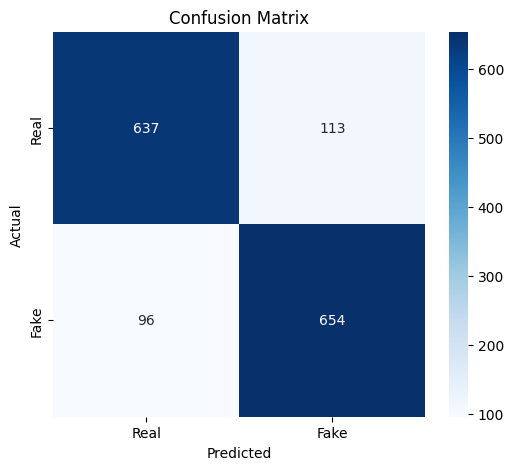

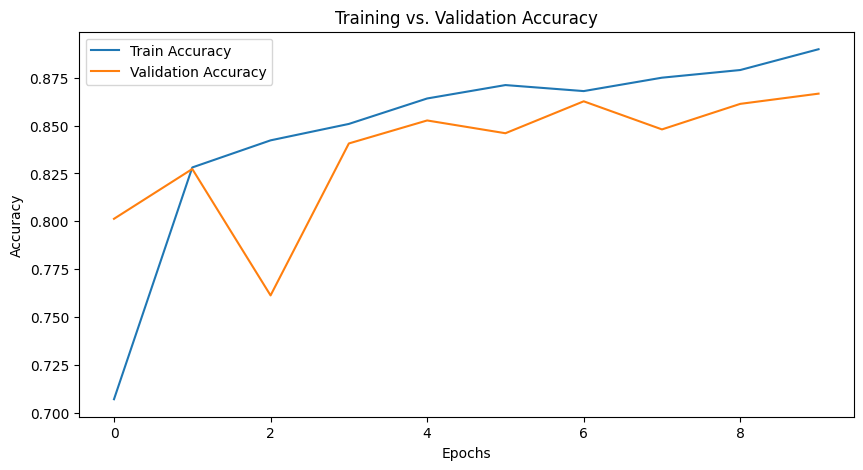

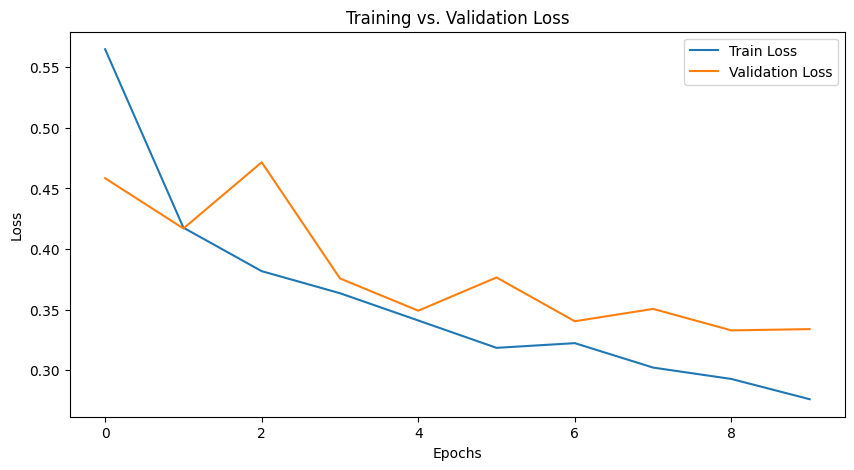

In [32]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

# Predict on the test set
y_pred_probs = model.predict([X_test_embeddings, X_test_sentiment, X_test_pos, X_test_tfidf])
y_pred = (y_pred_probs > 0.5).astype(int)  # Convert probabilities to binary labels

# Calculate metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Print classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Print individual metrics
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Real", "Fake"], yticklabels=["Real", "Fake"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

# Plot Training History
plt.figure(figsize=(10, 5))
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.title("Training vs. Validation Accuracy")
plt.show()

plt.figure(figsize=(10, 5))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.title("Training vs. Validation Loss")
plt.show()


# ***CNN+Bi-LSTM***

In [33]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Conv1D, MaxPooling1D, Bidirectional, LSTM, Dense, Dropout, Flatten, Concatenate

# Load Updated Dataset with POS & TF-IDF Features
train_df = pd.read_csv("/content/train-data.csv")  # Updated dataset with all features
test_df = pd.read_csv("/content/test_data.csv")
val_df = pd.read_csv("/content/validation_data.csv")

# Extract Features
embedding_columns = [f"dim_{i}" for i in range(300)]  # 300D GloVe Embeddings
pos_columns = [col for col in train_df.columns if col.startswith("POS_")]  # POS Features
tfidf_columns = [col for col in train_df.columns if col.startswith("TFIDF_")]  # TF-IDF Features

X_train_embeddings = train_df[embedding_columns].values
X_test_embeddings = test_df[embedding_columns].values
X_val_embeddings = val_df[embedding_columns].values

X_train_sentiment = train_df["final_sentiment_score"].values.reshape(-1, 1)
X_test_sentiment = test_df["final_sentiment_score"].values.reshape(-1, 1)
X_val_sentiment = val_df["final_sentiment_score"].values.reshape(-1, 1)

X_train_pos = train_df[pos_columns].values  # POS Features
X_test_pos = test_df[pos_columns].values
X_val_pos = val_df[pos_columns].values

X_train_tfidf = train_df[tfidf_columns].values  # TF-IDF Features
X_test_tfidf = test_df[tfidf_columns].values
X_val_tfidf = val_df[tfidf_columns].values

y_train = train_df["Label"].values
y_test = test_df["Label"].values
y_val = val_df["Label"].values

# Reshape Embeddings for CNN Input (CNN expects 3D input: samples, time steps, features)
X_train_embeddings = X_train_embeddings.reshape(X_train_embeddings.shape[0], 1, 300)
X_test_embeddings = X_test_embeddings.reshape(X_test_embeddings.shape[0], 1, 300)
X_val_embeddings = X_val_embeddings.reshape(X_val_embeddings.shape[0], 1, 300)

# Define Model Inputs
embedding_input = Input(shape=(1, 300), name="Embedding_Input")  # 300D GloVe embeddings
sentiment_input = Input(shape=(1,), name="Sentiment_Input")  # Sentiment Score
pos_input = Input(shape=(len(pos_columns),), name="POS_Input")  # POS Features
tfidf_input = Input(shape=(len(tfidf_columns),), name="TFIDF_Input")  # TF-IDF Features

# CNN Layer
cnn_layer = Conv1D(filters=128, kernel_size=5, activation='relu', padding="same")(embedding_input)
cnn_layer = MaxPooling1D(pool_size=1)(cnn_layer)
cnn_layer = Flatten()(cnn_layer)

# Bi-LSTM Layer
bi_lstm_layer = Bidirectional(LSTM(64))(embedding_input)

# Combine CNN, Bi-LSTM, Sentiment Score, POS Features, and TF-IDF Features
merged = Concatenate()([cnn_layer, bi_lstm_layer, sentiment_input, pos_input, tfidf_input])

# Fully Connected Layers
fc = Dense(128, activation='relu')(merged)
fc = Dropout(0.3)(fc)
fc = Dense(64, activation='relu')(fc)
fc = Dropout(0.3)(fc)
output = Dense(1, activation='sigmoid')(fc)  # Binary classification (fake vs real)

# Compile Model
model = Model(inputs=[embedding_input, sentiment_input, pos_input, tfidf_input], outputs=output)
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Model Summary
model.summary()

# Train Model
history = model.fit(
    [X_train_embeddings, X_train_sentiment, X_train_pos, X_train_tfidf], y_train,
    validation_data=([X_val_embeddings, X_val_sentiment, X_val_pos, X_val_tfidf], y_val),
    epochs=10, batch_size=16
)

# Evaluate Model
test_loss, test_acc = model.evaluate([X_test_embeddings, X_test_sentiment, X_test_pos, X_test_tfidf], y_test)
print(f"Test Accuracy: {test_acc * 100:.4f}")

# Save Model
model.save("cnn_bilstm_sentiment_pos_tfidf_model.h5")


Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ Embedding_Input           │ (None, 1, 300)         │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1d_1 (Conv1D)         │ (None, 1, 128)         │        192,128 │ Embedding_Input[0][0]  │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ max_pooling1d_1           │ (None, 1, 128)         │              0 │ conv1d_1[0][0]         │
│ (MaxPooling1D)            │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ flatten_1 (Flatten)       │ (None, 128)            │              0 │ max_pooling1d_1[0][0]  │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ bidirectional             │ (None, 128)            │        186,880 │ Embedding_Input[0][0]  │
│ (Bidirectional)           │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ Sentiment_Input           │ (None, 1)              │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ POS_Input (InputLayer)    │ (None, 0)              │              0 │ -                      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ TFIDF_Input (InputLayer)  │ (None, 0)              │              0 │ -                      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ concatenate_1             │ (None, 257)            │              0 │ flatten_1[0][0],       │
│ (Concatenate)             │                        │                │ bidirectional[0][0],   │
│                           │                        │                │ Sentiment_Input[0][0], │
│                           │                        │                │ POS_Input[0][0],       │
│                           │                        │                │ TFIDF_Input[0][0]      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_3 (Dense)           │ (None, 128)            │         33,024 │ concatenate_1[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dropout_2 (Dropout)       │ (None, 128)            │              0 │ dense_3[0][0]          │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_4 (Dense)           │ (None, 64)             │          8,256 │ dropout_2[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dropout_3 (Dropout)       │ (None, 64)             │              0 │ dense_4[0][0]          │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_5 (Dense)           │ (None, 1)              │             65 │ dropout_3[0][0]        │
└───────────────────────────┴────────────────────────┴────────────────┴────────────────────────┘

 Total params: 420,353 (1.60 MB)

 Trainable params: 420,353 (1.60 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
438/438 ━━━━━━━━━━━━━━━━━━━━ 14s 20ms/step - accuracy: 0.6393 - loss: 0.6135 - val_accuracy: 0.8100 - val_loss: 0.4379
Epoch 2/10
438/438 ━━━━━━━━━━━━━━━━━━━━ 5s 12ms/step - accuracy: 0.8261 - loss: 0.4269 - val_accuracy: 0.7547 - val_loss: 0.5347
Epoch 3/10
438/438 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - accuracy: 0.8404 - loss: 0.3843 - val_accuracy: 0.8327 - val_loss: 0.3936
Epoch 4/10
438/438 ━━━━━━━━━━━━━━━━━━━━ 7s 15ms/step - accuracy: 0.8578 - loss: 0.3552 - val_accuracy: 0.8393 - val_loss: 0.3755
Epoch 5/10
438/438 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - accuracy: 0.8587 - loss: 0.3407 - val_accuracy: 0.8593 - val_loss: 0.3562
Epoch 6/10
438/438 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step - accuracy: 0.8663 - loss: 0.3314 - val_accuracy: 0.8500 - val_loss: 0.3514
Epoch 7/10
438/438 ━━━━━━━━━━━━━━━━━━━━ 7s 14ms/step - accuracy: 0.8785 - loss: 0.2944 - val_accuracy: 0.8500 - val_loss: 0.3676
Epoch 8/10
438/438 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - accuracy: 0.8776 - loss: 0.2984 - val_acc

Test Accuracy: 85.4000


47/47 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step
Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.93      0.86       750
           1       0.92      0.78      0.84       750

    accuracy                           0.85      1500
   macro avg       0.86      0.85      0.85      1500
weighted avg       0.86      0.85      0.85      1500



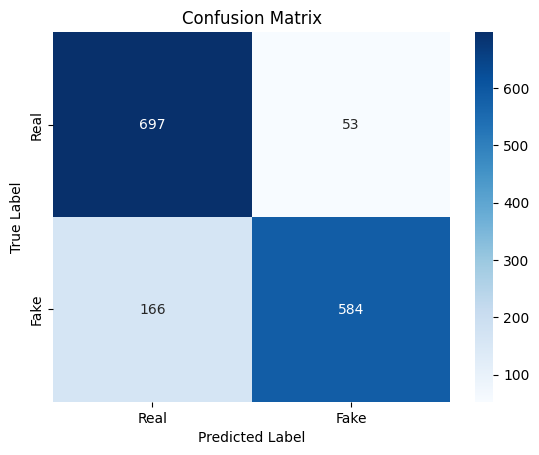

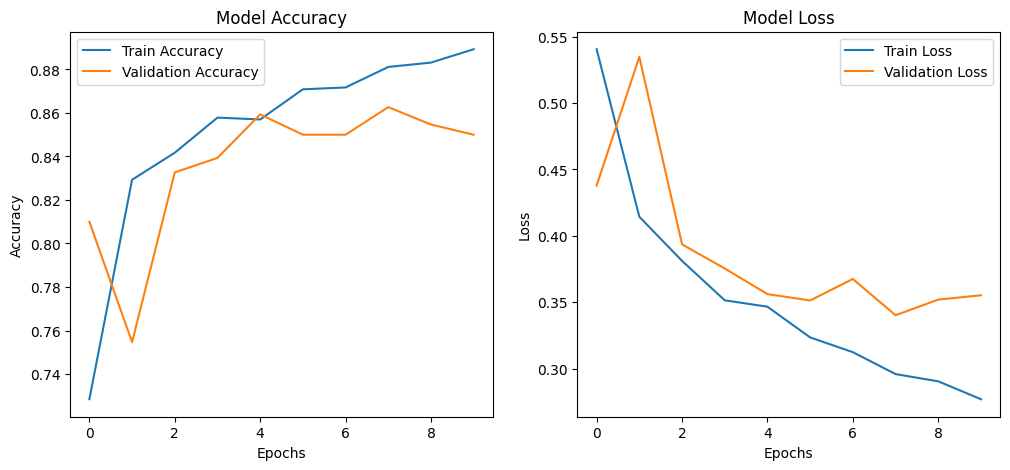

In [34]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np

# Predict on Test Set
y_pred_probs = model.predict([X_test_embeddings, X_test_sentiment, X_test_pos, X_test_tfidf])
y_pred = (y_pred_probs > 0.5).astype(int)

# Classification Report
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Real', 'Fake'], yticklabels=['Real', 'Fake'])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

# Plot Training History
plt.figure(figsize=(12, 5))

# Accuracy Plot
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Model Accuracy')

# Loss Plot
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Model Loss')

plt.show()

# ***CNN+GRU***

In [35]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Conv1D, MaxPooling1D, GRU, Dense, Dropout, Flatten, Concatenate

# Load Updated Dataset with POS & TF-IDF Features
train_df = pd.read_csv("/content/train-data.csv")
test_df = pd.read_csv("/content/test_data.csv")
val_df = pd.read_csv("/content/validation_data.csv")

# Extract Features
embedding_columns = [f"dim_{i}" for i in range(300)]  # 300D GloVe Embeddings
pos_columns = [col for col in train_df.columns if col.startswith("POS_")]  # POS Features
tfidf_columns = [col for col in train_df.columns if col.startswith("TFIDF_")]  # TF-IDF Features

X_train_embeddings = train_df[embedding_columns].values
X_test_embeddings = test_df[embedding_columns].values
X_val_embeddings = val_df[embedding_columns].values

X_train_sentiment = train_df["final_sentiment_score"].values.reshape(-1, 1)
X_test_sentiment = test_df["final_sentiment_score"].values.reshape(-1, 1)
X_val_sentiment = val_df["final_sentiment_score"].values.reshape(-1, 1)

X_train_pos = train_df[pos_columns].values  # POS Features
X_test_pos = test_df[pos_columns].values
X_val_pos = val_df[pos_columns].values

X_train_tfidf = train_df[tfidf_columns].values  # TF-IDF Features
X_test_tfidf = test_df[tfidf_columns].values
X_val_tfidf = val_df[tfidf_columns].values

y_train = train_df["Label"].values
y_test = test_df["Label"].values
y_val = val_df["Label"].values

# Reshape Embeddings for CNN Input
X_train_embeddings = X_train_embeddings.reshape(X_train_embeddings.shape[0], 1, 300)
X_test_embeddings = X_test_embeddings.reshape(X_test_embeddings.shape[0], 1, 300)
X_val_embeddings = X_val_embeddings.reshape(X_val_embeddings.shape[0], 1, 300)

# Define Model Inputs
embedding_input = Input(shape=(1, 300), name="Embedding_Input")
sentiment_input = Input(shape=(1,), name="Sentiment_Input")
pos_input = Input(shape=(len(pos_columns),), name="POS_Input")
tfidf_input = Input(shape=(len(tfidf_columns),), name="TFIDF_Input")

# CNN Layer
cnn_layer = Conv1D(filters=128, kernel_size=5, activation='relu', padding="same")(embedding_input)
cnn_layer = MaxPooling1D(pool_size=1)(cnn_layer)
cnn_layer = Flatten()(cnn_layer)

# GRU Layer
gru_layer = GRU(128, return_sequences=False)(embedding_input)

# Combine CNN, GRU, Sentiment Score, POS Features, and TF-IDF Features
merged = Concatenate()([cnn_layer, gru_layer, sentiment_input, pos_input, tfidf_input])

# Fully Connected Layers
fc = Dense(128, activation='relu')(merged)
fc = Dropout(0.3)(fc)
fc = Dense(64, activation='relu')(fc)
fc = Dropout(0.3)(fc)
output = Dense(1, activation='sigmoid')(fc)  # Binary classification (fake vs real)

# Compile Model
model = Model(inputs=[embedding_input, sentiment_input, pos_input, tfidf_input], outputs=output)
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Model Summary
model.summary()

# Train Model
history = model.fit(
    [X_train_embeddings, X_train_sentiment, X_train_pos, X_train_tfidf], y_train,
    validation_data=([X_val_embeddings, X_val_sentiment, X_val_pos, X_val_tfidf], y_val),
    epochs=10, batch_size=16
)

# Evaluate Model
test_loss, test_acc = model.evaluate([X_test_embeddings, X_test_sentiment, X_test_pos, X_test_tfidf], y_test)
print(f"Test Accuracy: {test_acc * 100:.4f}%")

# Save Model
model.save("cnn_gru_sentiment_pos_tfidf_model.h5")
print("✅ Model trained and saved successfully!")


Model: "functional_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ Embedding_Input           │ (None, 1, 300)         │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1d_2 (Conv1D)         │ (None, 1, 128)         │        192,128 │ Embedding_Input[0][0]  │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ max_pooling1d_2           │ (None, 1, 128)         │              0 │ conv1d_2[0][0]         │
│ (MaxPooling1D)            │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ flatten_2 (Flatten)       │ (None, 128)            │              0 │ max_pooling1d_2[0][0]  │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ gru (GRU)                 │ (None, 128)            │        165,120 │ Embedding_Input[0][0]  │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ Sentiment_Input           │ (None, 1)              │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ POS_Input (InputLayer)    │ (None, 0)              │              0 │ -                      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ TFIDF_Input (InputLayer)  │ (None, 0)              │              0 │ -                      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ concatenate_2             │ (None, 257)            │              0 │ flatten_2[0][0],       │
│ (Concatenate)             │                        │                │ gru[0][0],             │
│                           │                        │                │ Sentiment_Input[0][0], │
│                           │                        │                │ POS_Input[0][0],       │
│                           │                        │                │ TFIDF_Input[0][0]      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_6 (Dense)           │ (None, 128)            │         33,024 │ concatenate_2[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dropout_4 (Dropout)       │ (None, 128)            │              0 │ dense_6[0][0]          │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_7 (Dense)           │ (None, 64)             │          8,256 │ dropout_4[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dropout_5 (Dropout)       │ (None, 64)             │              0 │ dense_7[0][0]          │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_8 (Dense)           │ (None, 1)              │             65 │ dropout_5[0][0]        │
└───────────────────────────┴────────────────────────┴────────────────┴────────────────────────┘

 Total params: 398,593 (1.52 MB)

 Trainable params: 398,593 (1.52 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
438/438 ━━━━━━━━━━━━━━━━━━━━ 8s 10ms/step - accuracy: 0.6338 - loss: 0.6267 - val_accuracy: 0.8027 - val_loss: 0.4519
Epoch 2/10
438/438 ━━━━━━━━━━━━━━━━━━━━ 7s 15ms/step - accuracy: 0.8198 - loss: 0.4296 - val_accuracy: 0.8313 - val_loss: 0.3994
Epoch 3/10
438/438 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - accuracy: 0.8386 - loss: 0.3863 - val_accuracy: 0.8433 - val_loss: 0.3862
Epoch 4/10
438/438 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - accuracy: 0.8589 - loss: 0.3609 - val_accuracy: 0.8420 - val_loss: 0.3762
Epoch 5/10
438/438 ━━━━━━━━━━━━━━━━━━━━ 6s 14ms/step - accuracy: 0.8733 - loss: 0.3245 - val_accuracy: 0.8280 - val_loss: 0.3948
Epoch 6/10
438/438 ━━━━━━━━━━━━━━━━━━━━ 8s 10ms/step - accuracy: 0.8650 - loss: 0.3322 - val_accuracy: 0.8613 - val_loss: 0.3401
Epoch 7/10
438/438 ━━━━━━━━━━━━━━━━━━━━ 5s 12ms/step - accuracy: 0.8683 - loss: 0.3200 - val_accuracy: 0.8473 - val_loss: 0.3591
Epoch 8/10
438/438 ━━━━━━━━━━━━━━━━━━━━ 6s 12ms/step - accuracy: 0.8821 - loss: 0.2896 - val_accu

Test Accuracy: 85.8667%
✅ Model trained and saved successfully!


47/47 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step
Classification Report:
               precision    recall  f1-score   support

        Fake       0.81      0.93      0.87       750
        Real       0.92      0.79      0.85       750

    accuracy                           0.86      1500
   macro avg       0.87      0.86      0.86      1500
weighted avg       0.87      0.86      0.86      1500



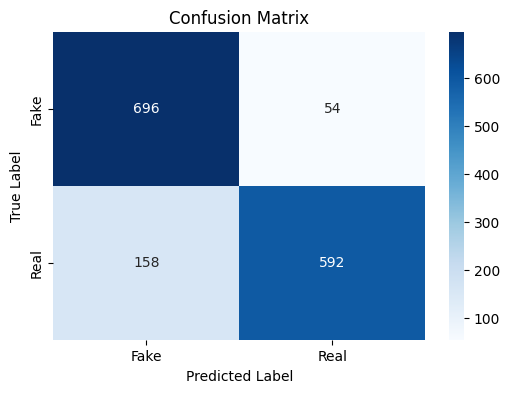

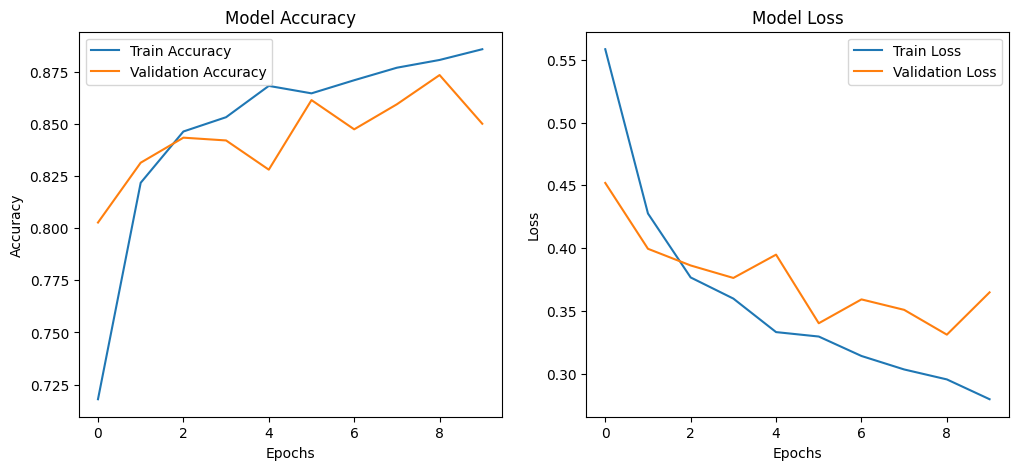

In [36]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix

# Generate Predictions
y_pred_probs = model.predict([X_test_embeddings, X_test_sentiment, X_test_pos, X_test_tfidf])
y_pred = (y_pred_probs > 0.5).astype(int)  # Convert probabilities to binary labels

# Classification Report
print("Classification Report:\n", classification_report(y_test, y_pred, target_names=["Fake", "Real"]))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Fake", "Real"], yticklabels=["Fake", "Real"])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

# Plot Training History
plt.figure(figsize=(12, 5))

# Accuracy Plot
plt.subplot(1, 2, 1)
plt.plot(history.history["accuracy"], label="Train Accuracy")
plt.plot(history.history["val_accuracy"], label="Validation Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.title("Model Accuracy")
plt.legend()

# Loss Plot
plt.subplot(1, 2, 2)
plt.plot(history.history["loss"], label="Train Loss")
plt.plot(history.history["val_loss"], label="Validation Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Model Loss")
plt.legend()

plt.show()


# ***CNN+Bi-LSTM+GRU***

In [37]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import (
    Input, Conv1D, MaxPooling1D, Bidirectional, LSTM, GRU, Dense, Dropout, Flatten, Concatenate
)

# ✅ Load Processed Data (Train, Test, Validation)
train_df = pd.read_csv("/content/train-data.csv")
test_df = pd.read_csv("/content/test_data.csv")
val_df = pd.read_csv("/content/validation_data.csv")

# ✅ Extract Features
embedding_columns = [f"dim_{i}" for i in range(300)]  # 300D GloVe embeddings
pos_columns = train_df.columns[train_df.columns.str.startswith("POS_")].tolist()  # POS features
tfidf_columns = train_df.columns[train_df.columns.str.startswith("TFIDF_")].tolist()  # TF-IDF features

# ✅ Extract GloVe Embeddings
X_train_emb = train_df[embedding_columns].values
X_test_emb = test_df[embedding_columns].values
X_val_emb = val_df[embedding_columns].values

# ✅ Extract Sentiment Scores
X_train_sent = train_df["final_sentiment_score"].values.reshape(-1, 1)
X_test_sent = test_df["final_sentiment_score"].values.reshape(-1, 1)
X_val_sent = val_df["final_sentiment_score"].values.reshape(-1, 1)

# ✅ Extract POS Features
X_train_pos = train_df[pos_columns].values
X_test_pos = test_df[pos_columns].values
X_val_pos = val_df[pos_columns].values

# ✅ Extract TF-IDF Features
X_train_tfidf = train_df[tfidf_columns].values
X_test_tfidf = test_df[tfidf_columns].values
X_val_tfidf = val_df[tfidf_columns].values

# ✅ Labels
y_train = train_df["Label"].values
y_test = test_df["Label"].values
y_val = val_df["Label"].values

# ✅ Reshape GloVe Embeddings for CNN
X_train_emb = X_train_emb.reshape(X_train_emb.shape[0], 1, 300)
X_test_emb = X_test_emb.reshape(X_test_emb.shape[0], 1, 300)
X_val_emb = X_val_emb.reshape(X_val_emb.shape[0], 1, 300)

# ✅ Define Model Inputs
embedding_input = Input(shape=(1, 300), name="Embedding_Input")  # CNN on GloVe
sentiment_input = Input(shape=(1,), name="Sentiment_Input")  # Sentiment Score
pos_input = Input(shape=(X_train_pos.shape[1],), name="POS_Input")  # POS Features
tfidf_input = Input(shape=(X_train_tfidf.shape[1],), name="TFIDF_Input")  # TF-IDF Features

# ✅ CNN on GloVe Embeddings
conv1d = Conv1D(filters=128, kernel_size=3, activation='relu', padding="same")(embedding_input)
conv1d = MaxPooling1D(pool_size=1)(conv1d)
conv1d = Flatten()(conv1d)

# ✅ Bi-LSTM Layer
bilstm_layer = Bidirectional(LSTM(64, return_sequences=True))(embedding_input)

# ✅ GRU Layer
gru_layer = GRU(64)(bilstm_layer)

# ✅ Merge CNN, Bi-LSTM, GRU, Sentiment, POS, and TF-IDF Features
merged = Concatenate()([conv1d, gru_layer, sentiment_input, pos_input, tfidf_input])

# ✅ Fully Connected Layers
fc = Dense(128, activation='relu')(merged)
fc = Dropout(0.3)(fc)
fc = Dense(64, activation='relu')(fc)
fc = Dropout(0.3)(fc)
output = Dense(1, activation='sigmoid')(fc)  # Binary classification

# ✅ Compile Model
model = Model(inputs=[embedding_input, sentiment_input, pos_input, tfidf_input], outputs=output)
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# ✅ Model Summary
model.summary()

# ✅ Train Model
history = model.fit(
    [X_train_emb, X_train_sent, X_train_pos, X_train_tfidf], y_train,
    validation_data=([X_val_emb, X_val_sent, X_val_pos, X_val_tfidf], y_val),
    epochs=10, batch_size=16
)

# ✅ Evaluate Model
test_loss, test_acc = model.evaluate([X_test_emb, X_test_sent, X_test_pos, X_test_tfidf], y_test)
print(f"Test Accuracy: {test_acc * 100:.4f}%")

# ✅ Save Model
model.save("cnn_bilstm_gru_300d_features_model.h5")
print("✅ Model trained and saved successfully!")


Model: "functional_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ Embedding_Input           │ (None, 1, 300)         │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1d_3 (Conv1D)         │ (None, 1, 128)         │        115,328 │ Embedding_Input[0][0]  │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ max_pooling1d_3           │ (None, 1, 128)         │              0 │ conv1d_3[0][0]         │
│ (MaxPooling1D)            │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ bidirectional_1           │ (None, 1, 128)         │        186,880 │ Embedding_Input[0][0]  │
│ (Bidirectional)           │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ flatten_3 (Flatten)       │ (None, 128)            │              0 │ max_pooling1d_3[0][0]  │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ gru_1 (GRU)               │ (None, 64)             │         37,248 │ bidirectional_1[0][0]  │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ Sentiment_Input           │ (None, 1)              │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ POS_Input (InputLayer)    │ (None, 0)              │              0 │ -                      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ TFIDF_Input (InputLayer)  │ (None, 0)              │              0 │ -                      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ concatenate_3             │ (None, 193)            │              0 │ flatten_3[0][0],       │
│ (Concatenate)             │                        │                │ gru_1[0][0],           │
│                           │                        │                │ Sentiment_Input[0][0], │
│                           │                        │                │ POS_Input[0][0],       │
│                           │                        │                │ TFIDF_Input[0][0]      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_9 (Dense)           │ (None, 128)            │         24,832 │ concatenate_3[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dropout_6 (Dropout)       │ (None, 128)            │              0 │ dense_9[0][0]          │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_10 (Dense)          │ (None, 64)             │          8,256 │ dropout_6[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dropout_7 (Dropout)       │ (None, 64)             │              0 │ dense_10[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_11 (Dense)          │ (None, 1)              │             65 │ dropout_7[0][0]        │
└───────────────────────────┴────────────────────────┴────────────────┴────────────────────────┘

 Total params: 372,609 (1.42 MB)

 Trainable params: 372,609 (1.42 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
438/438 ━━━━━━━━━━━━━━━━━━━━ 15s 15ms/step - accuracy: 0.6470 - loss: 0.6133 - val_accuracy: 0.8133 - val_loss: 0.4457
Epoch 2/10
438/438 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - accuracy: 0.8286 - loss: 0.4168 - val_accuracy: 0.8200 - val_loss: 0.4284
Epoch 3/10
438/438 ━━━━━━━━━━━━━━━━━━━━ 8s 16ms/step - accuracy: 0.8504 - loss: 0.3753 - val_accuracy: 0.8393 - val_loss: 0.4096
Epoch 4/10
438/438 ━━━━━━━━━━━━━━━━━━━━ 8s 10ms/step - accuracy: 0.8562 - loss: 0.3577 - val_accuracy: 0.8207 - val_loss: 0.4000
Epoch 5/10
438/438 ━━━━━━━━━━━━━━━━━━━━ 8s 16ms/step - accuracy: 0.8693 - loss: 0.3246 - val_accuracy: 0.8487 - val_loss: 0.3465
Epoch 6/10
438/438 ━━━━━━━━━━━━━━━━━━━━ 9s 13ms/step - accuracy: 0.8677 - loss: 0.3195 - val_accuracy: 0.8607 - val_loss: 0.3425
Epoch 7/10
438/438 ━━━━━━━━━━━━━━━━━━━━ 9s 10ms/step - accuracy: 0.8719 - loss: 0.3112 - val_accuracy: 0.8667 - val_loss: 0.3361
Epoch 8/10
438/438 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step - accuracy: 0.8747 - loss: 0.2959 - val_acc

Test Accuracy: 85.8667%
✅ Model trained and saved successfully!


47/47 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step
Classification Report:
               precision    recall  f1-score   support

        Fake       0.83      0.90      0.86       750
        Real       0.89      0.81      0.85       750

    accuracy                           0.86      1500
   macro avg       0.86      0.86      0.86      1500
weighted avg       0.86      0.86      0.86      1500



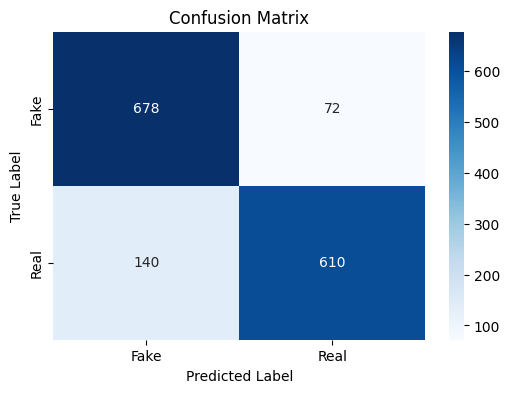

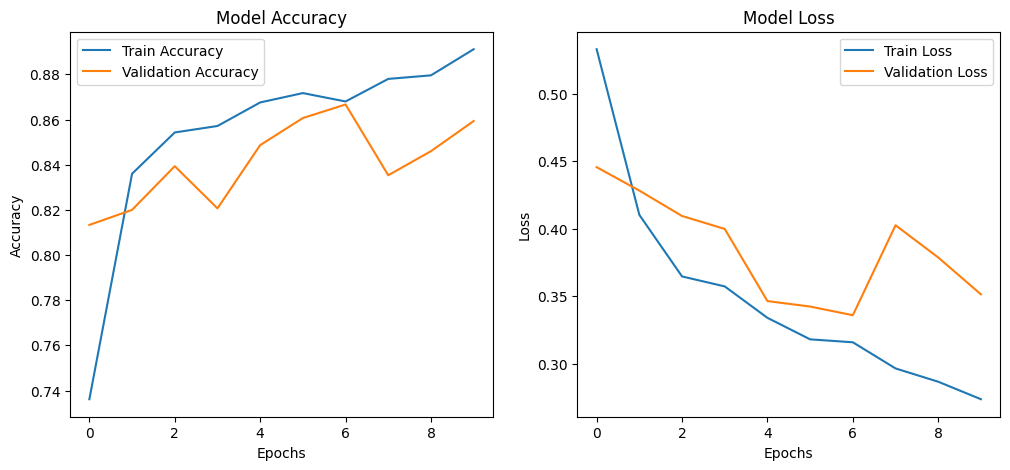

In [38]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix

# Generate Predictions
y_pred_probs = model.predict([X_test_emb, X_test_sent, X_test_pos, X_test_tfidf])
y_pred = (y_pred_probs > 0.5).astype(int)  # Convert probabilities to binary labels

# Classification Report
print("Classification Report:\n", classification_report(y_test, y_pred, target_names=["Fake", "Real"]))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Fake", "Real"], yticklabels=["Fake", "Real"])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

# Plot Training History
plt.figure(figsize=(12, 5))

# Accuracy Plot
plt.subplot(1, 2, 1)
plt.plot(history.history["accuracy"], label="Train Accuracy")
plt.plot(history.history["val_accuracy"], label="Validation Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.title("Model Accuracy")
plt.legend()

# Loss Plot
plt.subplot(1, 2, 2)
plt.plot(history.history["loss"], label="Train Loss")
plt.plot(history.history["val_loss"], label="Validation Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Model Loss")
plt.legend()

plt.show()
